In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load data from CSV
df = pd.read_csv("body_data.csv")  
df.head()

,Weight,Height,Age,Gender
0,79,1.80,35,Male
1,69,1.68,39,Male
2,73,1.82,25,Male
3,95,1.70,60,Male
4,82,1.87,27,Male


In [20]:
# Step 2: Preprocessing
# Convert Gender to numeric (Male: 1, Female: 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [21]:
# Step 3: Define independent variables (X) and dependent variable (y)
X = df[['Height', 'Age', 'Gender']]
y = df['Weight']

In [22]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Step 5: Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

In [25]:
# Step 7: Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Optional: Coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 76.57792714844265
R² Score: -11.252468343750825
Coefficients: [32.8353363   0.31729474 14.62311848]
Intercept: -3.0552172392595196


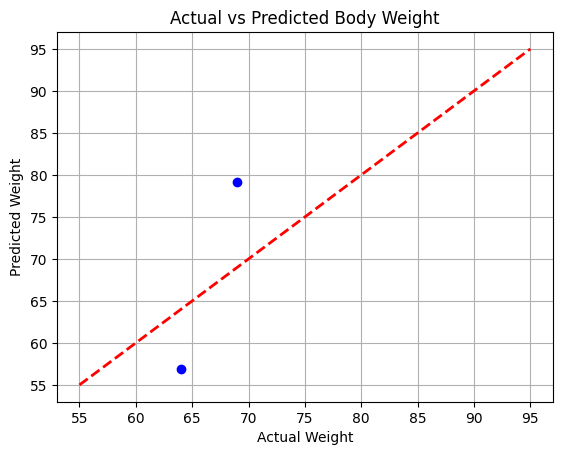

In [26]:


# Step 8: Visualize predicted vs actual weight
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Body Weight")
plt.grid(True)
plt.show()


In [27]:
# ==== User Input for Prediction ====
print("\nEnter new data to predict body weight:")
try:
    height = float(input("Enter height (in meters): "))
    age = int(input("Enter age (in years): "))
    gender_input = input("Enter gender (Male/Female): ").strip().capitalize()

    if gender_input not in ['Male', 'Female']:
        print("Invalid gender. Please enter Male or Female.")
    else:
        gender = 1 if gender_input == 'Male' else 0

        new_data = pd.DataFrame([[height, age, gender]], columns=['Height', 'Age', 'Gender'])
        predicted_weight = model.predict(new_data)[0]
        print(f"\n✅ Predicted Body Weight: {predicted_weight:.2f} kg")

except ValueError:
    print("Invalid input. Please enter correct numerical values.")


Enter new data to predict body weight:

✅ Predicted Body Weight: 73.07 kg
